## DFT i FFT 
lab 2 - MOWNIT

In [1]:
import numpy as np

In [2]:
import pandas as pd
fields = ['Total Passing Vehicle Volume']
train = pd.read_csv("C:/Users/ImI/Downloads/chicago-average-daily-traffic-counts/average-daily-traffic-counts.csv", skipinitialspace=True, usecols=fields)

In [3]:
train.head()

,Total Passing Vehicle Volume
0,14600
1,14600
2,16500
3,18200
4,21600


In [4]:
n=1279
y= train.values
train.head()

,Total Passing Vehicle Volume
0,14600
1,14600
2,16500
3,18200
4,21600


In [5]:
def dft(N, x):
    F = [[np.exp(-2j * np.pi * k * m / N) for k in range(0, N)] for m in range(0, N)]
    return np.dot(F, x)

In [6]:
dft_ok = dft(n, y)

In [7]:
dft_ok

array([[24897400.              +0.j        ],
       [ -472226.49175767+1475943.03592487j],
       [  706816.69402317 +277234.45310256j],
       ...,
       [  324716.03795634 +427824.29686245j],
       [  706816.69402371 -277234.45310251j],
       [ -472226.49175623-1475943.03592483j]])

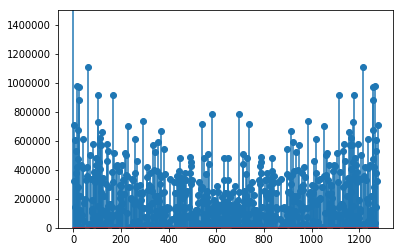

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(dft_ok)
ax.set_ylim(-1, 1500000)
plt.show()

### :( 
mało mówi nam ten wykres niestety

In [14]:
def fft(N, x):
    if N <= 2 or N % 2 == 1:
        return dft(N, x)
    S = N//2
    parzyste = fft(S, x[::2])
    nieparzyste = fft(S, x[1::2])
    krotnosc = np.exp(-2j * np.pi * np.arange(N) / N)
    wynik = np.concatenate([parzyste + krotnosc[:S] * nieparzyste, parzyste + krotnosc[S:] * nieparzyste])
    return wynik

In [15]:
fft_ok = dft(n, y)

In [16]:
fft_ok

array([[24897400.              +0.j        ],
       [ -472226.49175767+1475943.03592487j],
       [  706816.69402317 +277234.45310256j],
       ...,
       [  324716.03795634 +427824.29686245j],
       [  706816.69402371 -277234.45310251j],
       [ -472226.49175623-1475943.03592483j]])

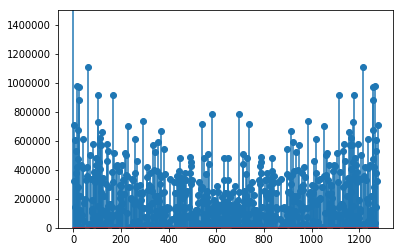

In [17]:
fig, ax = plt.subplots()
ax.stem(fft_ok)
ax.set_ylim(-1, 1500000)
plt.show()

wykresy są takie same dla DFT i FFT, jednak nie da się zebrać jakiejś zależności częstotliwości ruchu aut w Chicago :(